In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
import numpy as np

from sklearn.ensemble import ExtraTreesClassifier
from art.attacks.evasion import DecisionTreeAttack
from art.estimators.classification import SklearnClassifier
from art.estimators.classification.scikitlearn import ScikitlearnExtraTreesClassifier
from art.metrics import RobustnessVerificationTreeModelsCliqueMethod  

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4]


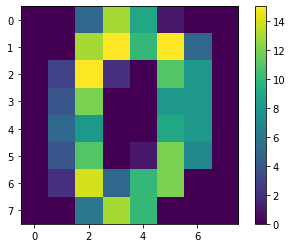

In [62]:
#샘플 데이터 로드
digits = load_digits()

#훈련, 테스트 데이터 나누기
x = digits.data
y = digits.target

#의사 결정 트리 선언
clf = DecisionTreeClassifier()
#훈련
clf.fit(x,y)

#공격 받기 전 예측 결과 출력
print(clf.predict(x[:15]))
plt.imshow(x[0].reshape(8,8))
plt.colorbar()

Decision tree attack:   0%|          | 0/15 [00:00<?, ?it/s]

[5 4 4 6 5 4 1 2 4 4 5 4 6 4 7]


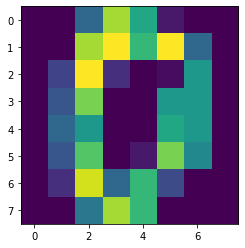

In [63]:
#모든 공격을 적용하기 위한 분류기
clf_art = SklearnClassifier(clf)

#Decision Tree 공격 선언
attack = DecisionTreeAttack(clf_art)
adv = attack.generate(x[:15])

print(clf.predict(adv))
plt.imshow(adv[0].reshape(8,8))
#plt.imshow((X[0]-adv[0]).reshape(8,8))  ##use this to plot the difference

Decision tree attack:   0%|          | 0/15 [00:00<?, ?it/s]

[6 6 7 7 8 8 9 9 1 1 2 2 3 3 5]


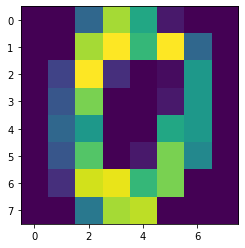

In [16]:
adv = attack.generate(x[:15],np.array([6,6,7,7,8,8,9,9,1,1,2,2,3,3,5]))
print(clf.predict(adv))
plt.imshow(adv[0].reshape(8,8))
#plt.imshow((X[0]-adv[0]).reshape(8,8))

Decision tree attack:   0%|          | 0/15 [00:00<?, ?it/s]

[5 4 4 4 5 4 1 2 4 4 5 4 4 4 7]
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4]


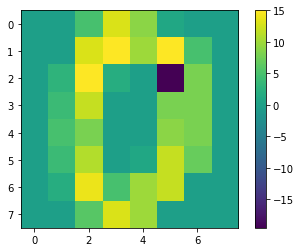

In [18]:
attack = DecisionTreeAttack(clf_art,offset=20.0)
adv = attack.generate(x[:15])
print(clf.predict(adv))
print(clf.predict(x[:15]))

plt.imshow(adv[0].reshape(8,8))
#plt.imshow((X[0]-adv[0]).reshape(8,8))
plt.colorbar()